## Exporting: Example 05 - Export polygon contours from fort.63.nc <br>
Created by Tomas Cuevas in 2023 <br> 
<br>
In this example, we will visualize the water level from a time-varying netcdf file <br>

In [2]:
from export import nc2shp, getDates
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import cmocean

**Inputs of the 'nc2shp' function**

In [11]:
## path of the input fort 14 file
filein = r'../adds/inputs_examples/fort.63.nc'

## coordinate system of the fort14 input
## Fort 14 almost always uses latitude and longitude
epsgIn = 4326

## coordinate system of the output shapefile
## For this example we use latitude and longitude
epsgOut = 4326

## name of the variable to contour
var = 'zeta'

## vertical unit of the output shapefile
vUnitOut = 'm'

## levels --> contours starting from -5 up to 5 every 1
levels = [-2.5, 2.5, 0.5]

## type of the contours
conType = 'polygon'

## full path of the output shapefile
pathOut = r'/home/tomas/Insync/tacuevas@ncsu.edu/Google Drive/NCSU/Kalpana/Debug/github_examples/export_example05.gpkg'

First we will print the dates of the fort.63 file. Florence made lanfdall around September 14 of 2008

In [6]:
dates = getDates(filein)
dates.head()

,dates
0,2018-09-11 01:00:00
1,2018-09-11 02:00:00
2,2018-09-11 03:00:00
3,2018-09-11 04:00:00
4,2018-09-11 05:00:00


In [7]:
dates[(dates['dates'] > '2018-09-14 12:00') & (dates['dates'] < '2018-09-15')]

,dates
84,2018-09-14 13:00:00
85,2018-09-14 14:00:00
86,2018-09-14 15:00:00
87,2018-09-14 16:00:00
88,2018-09-14 17:00:00
89,2018-09-14 18:00:00
90,2018-09-14 19:00:00
91,2018-09-14 20:00:00
92,2018-09-14 21:00:00
93,2018-09-14 22:00:00


In [12]:
timesteps = np.arange(84, 95)
gdf = nc2shp(filein, var, levels, conType, pathOut, epsgOut, 
             vUnitOut='m', vUnitIn='m', epsgIn=4326, subDomain=None, 
             epsgSubDom=None, exportMesh=False, meshName=None, dzFile=None, 
             zeroDif=-20, maxDif=-5, distThreshold=0.5, k=5, timesteps=timesteps)

2024-02-25 17:57:37.725 | INFO     | export:nc2shp:817 - Start exporting adcirc to shape
100%|██████████| 11/11 [01:23<00:00,  7.63s/it]
2024-02-25 17:59:05.602 | INFO     | export:nc2shp:847 -     Ready with the contours extraction: 1.399 min
2024-02-25 17:59:22.698 | INFO     | export:nc2shp:884 -     Saving file: 0.285 min
2024-02-25 17:59:22.698 | INFO     | export:nc2shp:901 - Ready with exporting code after: 1.684 min


In [15]:
gdf

,geometry,zMin,zMean,zMax,nTimeStep,date,nHours,variable,name
0,"POLYGON ((-79.10354 33.61254, -79.10354 33.612...",-2.75,-2.5,-2.25,84,2018-09-14 13:00:00,85.0,zeta,water surface elevation above geoid
1,"POLYGON ((-79.10708 33.60163, -79.10598 33.601...",-2.75,-2.5,-2.25,84,2018-09-14 13:00:00,85.0,zeta,water surface elevation above geoid
2,"POLYGON ((-79.09786 33.53741, -79.09786 33.537...",-2.75,-2.5,-2.25,84,2018-09-14 13:00:00,85.0,zeta,water surface elevation above geoid
3,"POLYGON ((-79.15765 33.33639, -79.16174 33.331...",-2.75,-2.5,-2.25,84,2018-09-14 13:00:00,85.0,zeta,water surface elevation above geoid
4,"POLYGON ((-79.16554 33.32055, -79.16554 33.320...",-2.75,-2.5,-2.25,84,2018-09-14 13:00:00,85.0,zeta,water surface elevation above geoid
...,...,...,...,...,...,...,...,...,...
54347,"POLYGON ((-77.21049 35.25363, -77.21049 35.253...",2.25,2.5,2.75,94,2018-09-14 23:00:00,95.0,zeta,water surface elevation above geoid
54348,"POLYGON ((-77.45589 35.65388, -77.45507 35.653...",2.25,2.5,2.75,94,2018-09-14 23:00:00,95.0,zeta,water surface elevation above geoid
54349,"POLYGON ((-63.80080 45.37957, -63.80097 45.378...",2.25,2.5,2.75,94,2018-09-14 23:00:00,95.0,zeta,water surface elevation above geoid
54350,"POLYGON ((-77.05065 35.15640, -77.04740 35.155...",2.25,2.5,2.75,94,2018-09-14 23:00:00,95.0,zeta,water surface elevation above geoid


(34.0, 37.0)

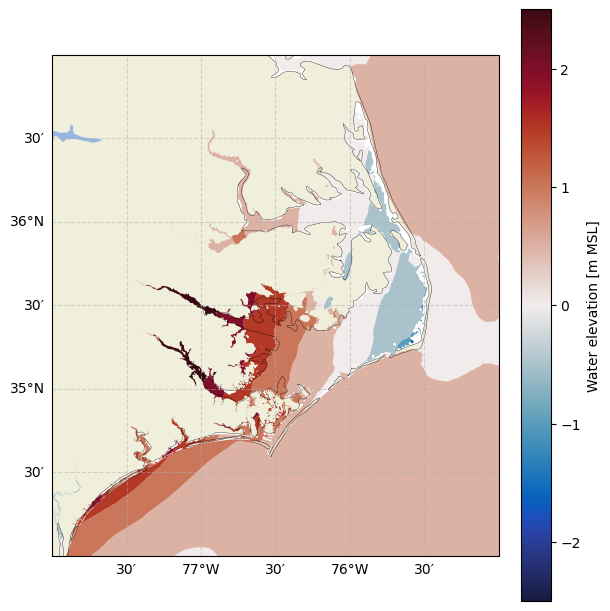

In [16]:
date_to_plot = '2018-09-14 13:00:00'

fig, ax = plt.subplots(figsize = (6, 6), subplot_kw={'projection': ccrs.PlateCarree()}, 
                            constrained_layout=True)
gdf[gdf['date'] == date_to_plot].plot(ax = ax, cmap = cmocean.cm.balance, 
                                      legend=True, column = 'zMean',
                                      legend_kwds={'label': 'Water elevation [m MSL]', 
                                                   'orientation': 'vertical'})
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, 
                  linestyle='--') 
gl.top_labels = False
gl.right_labels = False
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE,lw=0.25)
ax.add_feature(cfeature.LAKES)
ax.set_xlim([-78, -75])
ax.set_ylim([34, 37])

Good luck with Kalpana! <br>